In [126]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import lxml
import matplotlib.pyplot as plt

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
yearly_df = nfl.import_seasonal_data([2024])

In [91]:
weekly_df.columns

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_points

In [92]:
weekly_df = nfl.import_weekly_data([2024])

Downcasting floats.


In [93]:
wr_df = weekly_df[weekly_df['position'] == 'WR']

In [94]:
defense_df = pd.read_csv('defense.csv')

In [95]:
defense_df

,Rk,Tm,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,...,Y/G,Rate,Sk,Yds.1,QBHits,TFL,Sk%,NY/A,ANY/A,EXP
0,1.0,Philadelphia Eagles,17.0,19.8,31.9,62.2,174.2,1.29,4.1,0.76,...,174.2,82.5,2.41,17.9,5.12,4.76,7.0,5.10,4.8,0.72
1,2.0,Tennessee Titans,17.0,18.5,27.8,66.4,177.3,1.59,5.7,0.65,...,177.3,95.1,1.88,11.9,3.94,5.41,6.3,6.00,6.1,-5.28
2,3.0,Washington Commanders,17.0,18.1,29.2,61.9,189.5,1.47,5.0,0.41,...,189.5,93.9,2.53,15.9,5.18,5.06,8.0,6.00,6.3,-7.46
3,4.0,New York Jets,17.0,19.2,30.6,62.8,192.6,1.06,3.5,0.41,...,192.6,89.0,2.53,18.4,4.94,5.24,7.6,5.80,5.9,-5.45
4,5.0,San Francisco 49ers,17.0,19.9,30.4,65.5,192.8,1.47,4.8,0.65,...,192.8,92.0,2.18,11.6,4.71,3.94,6.7,5.90,5.9,-3.32
5,6.0,Houston Texans,17.0,19.2,32.6,58.8,201.0,1.82,5.6,1.12,...,201.0,83.7,2.88,19.8,5.76,6.24,8.1,5.70,5.3,-0.30
6,7.0,Los Angeles Chargers,17.0,21.6,33.2,65.0,206.9,1.41,4.2,0.88,...,206.9,87.1,2.71,14.4,5.76,4.59,7.5,5.80,5.4,-1.11
7,8.0,New York Giants,17.0,20.5,29.6,69.4,210.6,1.35,4.6,0.29,...,210.6,103.1,2.65,17.0,5.53,5.65,8.2,6.50,7.0,-5.78
8,9.0,Miami Dolphins,17.0,21.5,33.6,63.8,210.7,1.29,3.8,0.59,...,210.7,88.7,2.06,14.5,4.76,4.88,5.8,5.90,5.9,-2.16
9,10.0,New England Patriots,17.0,20.4,31.4,64.9,211.5,1.59,5.1,0.41,...,211.5,96.9,1.65,9.0,3.88,3.65,5.0,6.40,6.8,-7.03


In [96]:
nfl_team_abbreviations = {
    "Arizona Cardinals": "ARI",
    "Atlanta Falcons": "ATL",
    "Baltimore Ravens": "BAL",
    "Buffalo Bills": "BUF",
    "Carolina Panthers": "CAR",
    "Chicago Bears": "CHI",
    "Cincinnati Bengals": "CIN",
    "Cleveland Browns": "CLE",
    "Dallas Cowboys": "DAL",
    "Denver Broncos": "DEN",
    "Detroit Lions": "DET",
    "Green Bay Packers": "GB",
    "Houston Texans": "HOU",
    "Indianapolis Colts": "IND",
    "Jacksonville Jaguars": "JAX",
    "Kansas City Chiefs": "KC",
    "Las Vegas Raiders": "LV",
    "Los Angeles Chargers": "LAC",
    "Los Angeles Rams": "LAR",
    "Miami Dolphins": "MIA",
    "Minnesota Vikings": "MIN",
    "New England Patriots": "NE",
    "New Orleans Saints": "NO",
    "New York Giants": "NYG",
    "New York Jets": "NYJ",
    "Philadelphia Eagles": "PHI",
    "Pittsburgh Steelers": "PIT",
    "San Francisco 49ers": "SF",
    "Seattle Seahawks": "SEA",
    "Tampa Bay Buccaneers": "TB",
    "Tennessee Titans": "TEN",
    "Washington Commanders": "WAS", 
}

In [97]:
defense_df['Tm'] = defense_df['Tm'].map(nfl_team_abbreviations)

In [98]:
defense_df

,Rk,Tm,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,...,Y/G,Rate,Sk,Yds.1,QBHits,TFL,Sk%,NY/A,ANY/A,EXP
0,1.0,PHI,17.0,19.8,31.9,62.2,174.2,1.29,4.1,0.76,...,174.2,82.5,2.41,17.9,5.12,4.76,7.0,5.10,4.8,0.72
1,2.0,TEN,17.0,18.5,27.8,66.4,177.3,1.59,5.7,0.65,...,177.3,95.1,1.88,11.9,3.94,5.41,6.3,6.00,6.1,-5.28
2,3.0,WAS,17.0,18.1,29.2,61.9,189.5,1.47,5.0,0.41,...,189.5,93.9,2.53,15.9,5.18,5.06,8.0,6.00,6.3,-7.46
3,4.0,NYJ,17.0,19.2,30.6,62.8,192.6,1.06,3.5,0.41,...,192.6,89.0,2.53,18.4,4.94,5.24,7.6,5.80,5.9,-5.45
4,5.0,SF,17.0,19.9,30.4,65.5,192.8,1.47,4.8,0.65,...,192.8,92.0,2.18,11.6,4.71,3.94,6.7,5.90,5.9,-3.32
5,6.0,HOU,17.0,19.2,32.6,58.8,201.0,1.82,5.6,1.12,...,201.0,83.7,2.88,19.8,5.76,6.24,8.1,5.70,5.3,-0.30
6,7.0,LAC,17.0,21.6,33.2,65.0,206.9,1.41,4.2,0.88,...,206.9,87.1,2.71,14.4,5.76,4.59,7.5,5.80,5.4,-1.11
7,8.0,NYG,17.0,20.5,29.6,69.4,210.6,1.35,4.6,0.29,...,210.6,103.1,2.65,17.0,5.53,5.65,8.2,6.50,7.0,-5.78
8,9.0,MIA,17.0,21.5,33.6,63.8,210.7,1.29,3.8,0.59,...,210.7,88.7,2.06,14.5,4.76,4.88,5.8,5.90,5.9,-2.16
9,10.0,NE,17.0,20.4,31.4,64.9,211.5,1.59,5.1,0.41,...,211.5,96.9,1.65,9.0,3.88,3.65,5.0,6.40,6.8,-7.03


In [99]:
merged_df = pd.merge(wr_df, defense_df, left_on='opponent_team', right_on='Tm', how='inner')

In [100]:
merged_df.columns

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_points

In [101]:
merged_df

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,Y/G,Rate,Sk,Yds.1,QBHits,TFL,Sk%,NY/A,ANY/A,EXP
0,00-0030035,A.Thielen,Adam Thielen,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,CAR,2024,1,REG,...,238.5,84.8,2.29,14.1,4.94,4.53,6.2,6.4,6.0,-3.55
1,00-0031236,B.Cooks,Brandin Cooks,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,DAL,2024,2,REG,...,238.5,84.8,2.29,14.1,4.94,4.53,6.2,6.4,6.0,-3.55
2,00-0031408,M.Evans,Mike Evans,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,TB,2024,6,REG,...,238.5,84.8,2.29,14.1,4.94,4.53,6.2,6.4,6.0,-3.55
3,00-0031408,M.Evans,Mike Evans,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,TB,2024,18,REG,...,238.5,84.8,2.29,14.1,4.94,4.53,6.2,6.4,6.0,-3.55
4,00-0031941,J.Crowder,Jamison Crowder,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,WAS,2024,15,REG,...,238.5,84.8,2.29,14.1,4.94,4.53,6.2,6.4,6.0,-3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,00-0039650,B.Oliver,Bryce Oliver,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,TEN,2024,15,REG,...,223.5,91.9,2.12,12.8,6.18,4.24,5.9,6.2,6.1,-4.64
2161,00-0039868,T.Franklin,Troy Franklin,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,DEN,2024,17,REG,...,223.5,91.9,2.12,12.8,6.18,4.24,5.9,6.2,6.1,-4.64
2162,00-0039894,X.Worthy,Xavier Worthy,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,KC,2024,2,REG,...,223.5,91.9,2.12,12.8,6.18,4.24,5.9,6.2,6.1,-4.64
2163,00-0039907,J.Polk,Ja'Lynn Polk,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,NE,2024,1,REG,...,223.5,91.9,2.12,12.8,6.18,4.24,5.9,6.2,6.1,-4.64


In [102]:
merged_df.rename(columns={'Rk': 'opponent_rank', 'Yds': 'passing_yards_allowed'}, inplace=True)

In [106]:
relevant_features = [
    'player_id',
    'player_name',
    'opponent_team',
    'receiving_yards',
    'target_share',
    'wopr',
    'air_yards_share',
    'passing_yards_allowed',
    'opponent_rank'
    #'any other feature' if needed
]

In [107]:
relevant_df = merged_df[relevant_features].copy()

In [114]:
relevant_df[relevant_df['target_share'].isnull() == True]

,player_id,player_name,opponent_team,receiving_yards,target_share,wopr,air_yards_share,passing_yards_allowed,opponent_rank
15,00-0034854,K.Hodge,NO,0.0,NaN,NaN,NaN,0.772837,0.838710
34,00-0036913,K.Toney,NO,0.0,NaN,NaN,NaN,0.772837,0.838710
42,00-0037487,D.Thompkins,NO,0.0,NaN,NaN,NaN,0.772837,0.838710
182,00-0038359,X.Smith,LV,0.0,NaN,NaN,NaN,0.504808,0.451613
185,00-0038573,D.Davis,LV,0.0,NaN,NaN,NaN,0.504808,0.451613
419,00-0038979,C.Tillman,PHI,0.0,NaN,NaN,NaN,0.000000,0.000000
549,00-0037487,D.Thompkins,ARI,0.0,NaN,NaN,NaN,0.503606,0.419355
729,00-0035140,M.Hardman,CAR,0.0,NaN,NaN,NaN,0.606971,0.709677
766,00-0039589,K.Johnson,CAR,0.0,NaN,NaN,NaN,0.606971,0.709677
767,00-0039614,J.Jackson,CAR,0.0,NaN,NaN,NaN,0.606971,0.709677


In [115]:
relevant_df.dropna(subset=['target_share', 'wopr', 'air_yards_share'], inplace=True)

    

In [117]:
relevant_df.isnull().sum()

player_id                0
player_name              0
opponent_team            0
receiving_yards          0
target_share             0
wopr                     0
air_yards_share          0
passing_yards_allowed    0
opponent_rank            0
dtype: int64

In [118]:
numerical_features = ['target_share', 'wopr', 'air_yards_share','passing_yards_allowed', 'opponent_rank']
scaler = MinMaxScaler()
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])

In [119]:
features = ['target_share', 'wopr', 'air_yards_share', 'passing_yards_allowed', 'opponent_rank']

In [120]:
target = 'receiving_yards'

In [121]:
X_train, X_test, y_train, y_test = train_test_split(relevant_df[features], relevant_df[target], test_size=0.2, random_state=42)

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [124]:
print(f'R-squared: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 0.50
Root Mean Squared Error: 25.94


In [128]:
relevant_df['predicted_receiving_yards'] = model.predict(relevant_df[features])

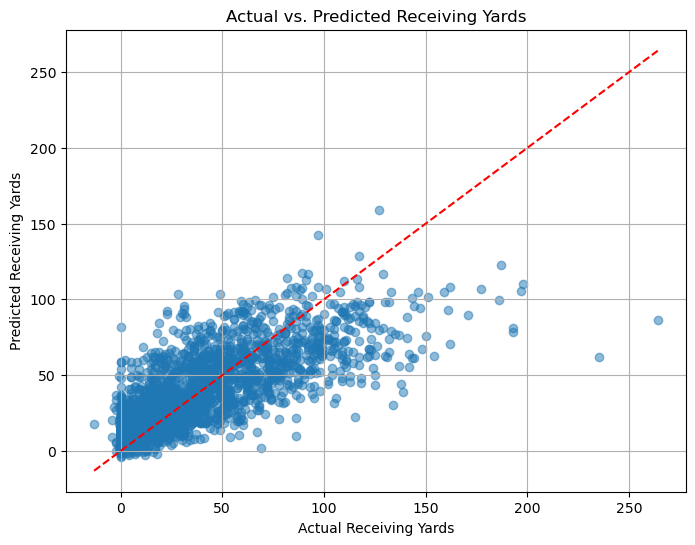

In [129]:
import matplotlib.pyplot as plt
# After making predictions
plt.figure(figsize=(8, 6))
plt.scatter(relevant_df['receiving_yards'], relevant_df['predicted_receiving_yards'], alpha=0.5)
plt.xlabel("Actual Receiving Yards")
plt.ylabel("Predicted Receiving Yards")
plt.title("Actual vs. Predicted Receiving Yards")
plt.plot([min(relevant_df['receiving_yards']), max(relevant_df['receiving_yards'])],
        [min(relevant_df['receiving_yards']), max(relevant_df['receiving_yards'])], color='red', linestyle='--') #Diagonal for perfect prediction
plt.grid(True)
plt.show()

In [130]:
def predict_receiving_yards_seasonal(player_name, opponent_team, model, scaler, df2, features, seasonal_data):
    """
    Predicts receiving yards using only seasonal data.

    Args:
        player_name (str): Name of the wide receiver.
        opponent_team (str): Name of the opposing team.
        model (sklearn model): The trained LinearRegression model.
        scaler (sklearn scaler): The fitted MinMaxScaler object
        df2 (pd.Dataframe): The team stats dataframe
        features (list): List of features used for prediction.
        seasonal_data (pd.DataFrame): DataFrame containing season-long player stats
    Returns:
        float: Predicted receiving yards.
    """

    # Try to get player stats from seasonal data

    seasonal_stats = seasonal_data[seasonal_data['player_name'] == player_name]
    if not seasonal_stats.empty:
        target_share = seasonal_stats['target_share'].iloc[0]
        wopr = seasonal_stats['wopr'].iloc[0]
        air_yards_share = seasonal_stats['air_yards_share'].iloc[0]
    else:
        print(f"Warning: Could not find player {player_name} in seasonal data")
        return np.nan  # Return NaN if player not found


    # Create a DataFrame from the fetched data
    new_data = {
        'player_name': [player_display_name],
        'opponent_team': [opponent_team],
        'target_share': [target_share],
        'wopr': [wopr],
         'air_yards_share': [air_yards_share]
    }
    new_df = pd.DataFrame(new_data)

    # Merge with the team dataframe
    new_df = pd.merge(new_df, df2, left_on='opponent_team', right_on='Tm', how='left')
    new_df.rename(columns={'Rk': 'opponent_rank', 'Yds': 'passing_yards_allowed'}, inplace=True)


    #Preprocess (dropna, scale)
    new_df.dropna(subset=['target_share', 'wopr', 'air_yards_share'], inplace=True)
    numerical_features = ['target_share', 'wopr', 'air_yards_share', 'passing_yards_allowed', 'opponent_rank']
    for col in numerical_features:
        new_df[col] = scaler.transform(new_df[[col]])

    # Make prediction
    X_new = new_df[features]
    predicted_yards = model.predict(X_new)[0]

    return predicted_yards




In [131]:
player_name = "Garrett Wilson"  # Example player name
opponent_team = "NYJ" #Example Team

predicted_yards = predict_receiving_yards_seasonal(player_name, opponent_team, model, scaler, df2, features, seasonal_data)
print(f"Predicted receiving yards for {player_name} against the {opponent_team}: {predicted_yards:.2f}")

NameError: name 'df2' is not defined